# The Pandemic Recovery

In thise project, I'll be looking at a few indicators economic to measure the economic recovery from COVID-19. This was inspired by the Daily Podcast on November 19th, 2020 - <a href="https://podcasts.apple.com/us/podcast/the-daily/id1200361736?i=1000499396205">The Pandemic Economy in 7 Numbers.</a>

I'll be using data from <a href="https://research.stlouisfed.org/">FRED</a> for this project.

In [2]:
import pandas_datareader as pdr
import pandas as pd
import datetime as dt
import os
import numpy as np

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots


In [3]:
start = dt.datetime(1980,1,1)
end = dt.datetime.now()

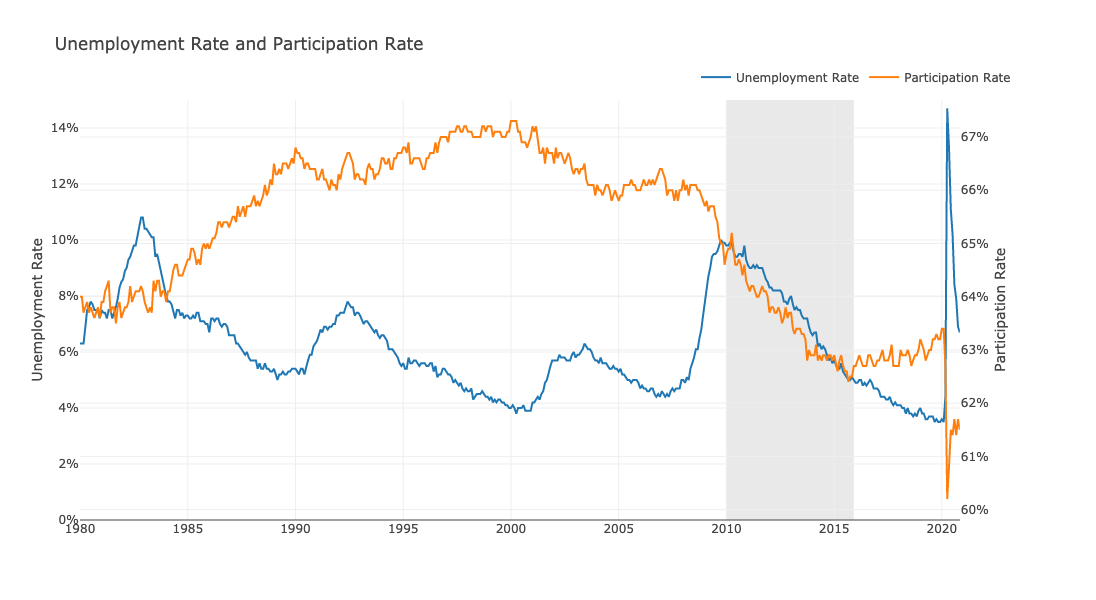

In [4]:
df = pdr.get_data_fred(['UNRATE','CIVPART'], start=start, end=end)

fig1 = make_subplots(specs=[[{"secondary_y": True}]])

fig1.add_trace(go.Scatter(x=df.index, y=df['UNRATE']/100, name='Unemployment Rate'),secondary_y=False)
fig1.add_trace(go.Scatter(x=df.index, y=df['CIVPART']/100, name='Participation Rate'),secondary_y=True)

fig1.update_layout(template='none', 
                   title='Unemployment Rate and Participation Rate', 
                   title_x=0.05, 
                   height=600, 
                   autosize=True, 
                   legend=dict(
                       orientation="h",
                       yanchor="bottom",
                       y=1.02,
                       xanchor="right",
                       x=1
                   ))

fig1.update_yaxes(title_text="Unemployment Rate",tickformat=".0%", secondary_y=False, range=[0,.15])
fig1.update_yaxes(title_text="Participation Rate", tickformat=".0%", secondary_y=True)

fig1.add_vrect(
    x0=dt.datetime(2010,1,1), x1=dt.datetime(2015,11,30),
    fillcolor="#D3D3D3", opacity=0.5,
    layer="below", line_width=0,
)
    
fig1.show()

The first data point I want to look at is the Unemployment Rate.

Along with the unemployment rate, I think it is important to include the participation rate. The participation rate is a measure of how many people who are considered eligilbe for work are actually looking for work. This is how 

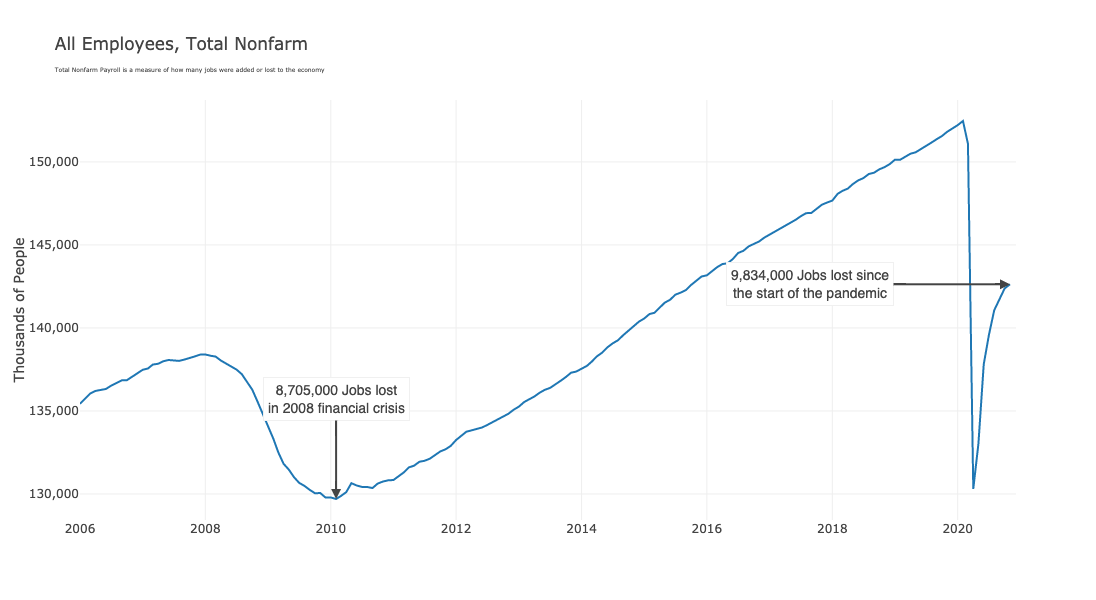

In [5]:
df = pdr.get_data_fred('PAYEMS', start=dt.datetime(2006,1,1), end=end)

fig2 = go.Figure()

fig2.add_trace(go.Scatter(x=df.index, y=df['PAYEMS'], name='All Employees, Total Nonfarm'))

fig2.update_layout(
    template='none', 
    title='All Employees, Total Nonfarm' + '<br>' +'<span style="font-size: 6px;">Total Nonfarm Payroll is a measure of how many jobs were added or lost to the economy</span>', 
    title_x=0.05, 
    height=600, 
    autosize=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ))

fig2.update_yaxes(title_text="Thousands of People",tickformat=",")

job_loss_2008 = ("{:,}").format(int(df.loc[dt.datetime(2008,1,1)] - int(df.loc[dt.datetime(2010,2,1)]))*1000)

fig2.add_annotation(
        x=dt.datetime(2010,2,1),
        y=int(df.loc[dt.datetime(2010,2,1)]),
        xref="x",
        yref="y",
        text=job_loss_2008+" Jobs lost<br>in 2008 financial crisis",
        showarrow=True,
        font=dict(
            family="Helvetica, monospace",
            size=14,
            color="#444444"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#444444",
        ax=0,
        ay=-100,
        bordercolor="#F0F0F0",
        borderwidth=1,
        borderpad=4,
        bgcolor="#FFFFFF",
        opacity=1
        )

fig2.add_annotation(
        x=df.index[-1], 
        y=int(df.iloc[-1]),
        xref="x",
        yref="y",
        text=("{:,}").format(int(df.max() - df.iloc[-1])*1000) + " Jobs lost since<br>the start of the pandemic</span>",
        showarrow=True,
        font=dict(
            family="Helvetica, monospace",
            size=14,
            color="#444444"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#444444",
        ax=-200,
        ay=0,
        bordercolor="#F0F0F0",
        borderwidth=1,
        borderpad=4,
        bgcolor="#FFFFFF",
        opacity=1
        )
    
fig2.show()

We have lost a lot of jobs. Compared to the 2008 recession, we lost a lot of jobs fast and recovered quickly. However, eight months in and we are still below the worst point in 2008. 

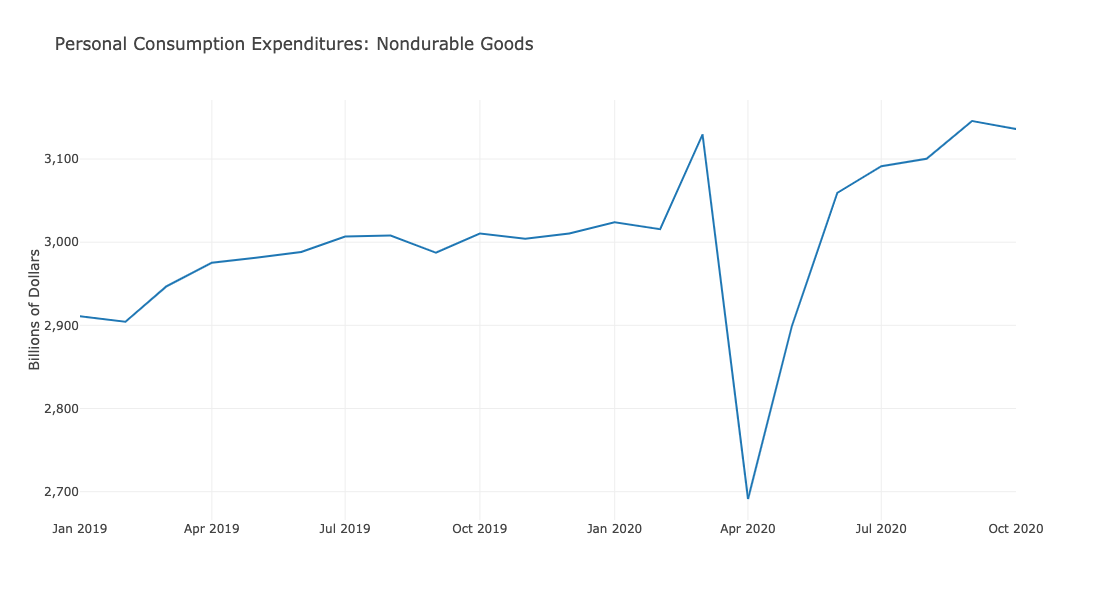

In [8]:
df = pdr.get_data_fred('PCEND', start=dt.datetime(2019,1,1), end=end)

fig3 = go.Figure()

fig3.add_trace(go.Scatter(x=df.index, y=df['PCEND'], name='All Employees, Total Nonfarm'))

fig3.update_layout(template='none', title='Personal Consumption Expenditures: Nondurable Goods', title_x=0.05, height=600, autosize=True,legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig3.update_yaxes(title_text="Billions of Dollars",tickformat=",")

fig3.show()

Here is some good news. People are buying stuff. We are buying more things than we have even before the pandemic.

Nondurable goods are things that are used or consumned quickly. Things you would buy at the grocery store mostly fit into this category. Consumer spending on goods has recovered to pre-pandemic levels.

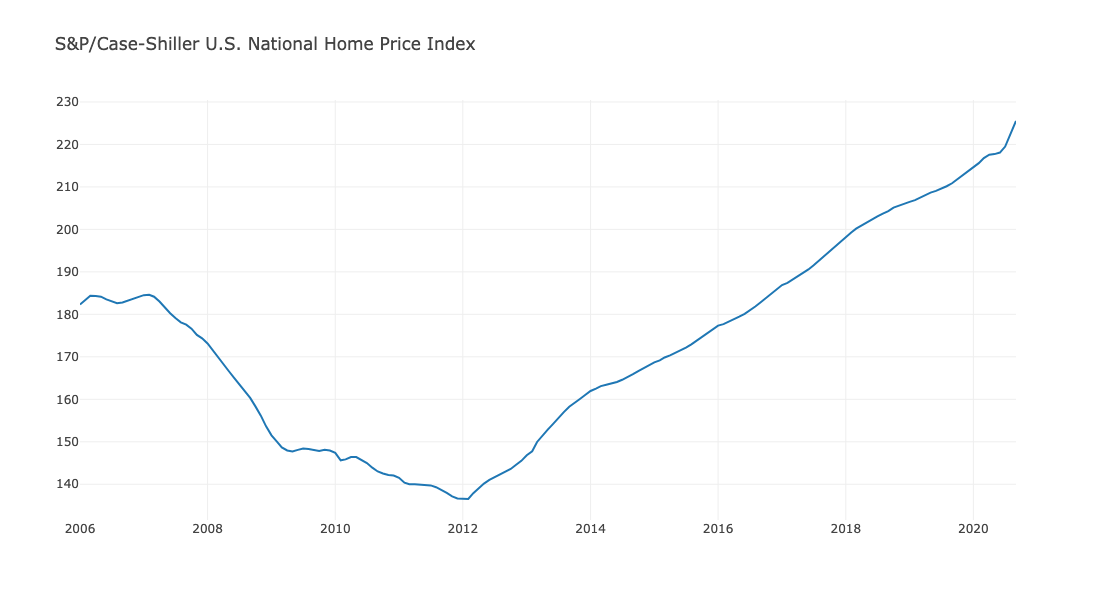

In [9]:
df = pdr.get_data_fred('CSUSHPISA', start=dt.datetime(2006,1,1), end=end)

fig4 = go.Figure()

fig4.add_trace(go.Scatter(x=df.index, y=df['CSUSHPISA'], name='Home Prices'))

fig4.update_layout(template='none', 
                   title='S&P/Case-Shiller U.S. National Home Price Index', 
                   title_x=0.05, 
                   height=600, 
                   autosize=True,
                   legend=dict(
                       orientation="h",
                       yanchor="bottom",
                       y=1.02,
                       xanchor="right",
                       x=1))

#fig4.update_yaxes(title_text="Thousands of People",tickformat=",")

The pandemic has caused a surge in home prices. The Case Shiller Index is a measure of existing home prices. People want to buy homes right now. If you have a home, it's a good time to sell if you want top dollar. 

# The Bad

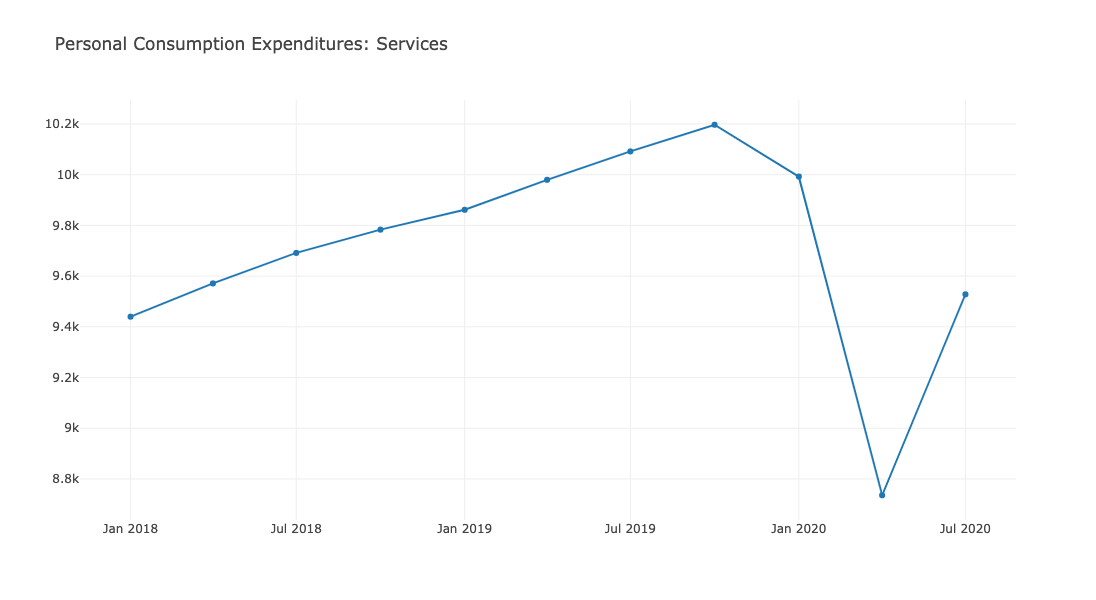

In [22]:
df = pdr.get_data_fred('PCESV', start=dt.datetime(2018,1,1), end=end)

fig4 = go.Figure()

fig4.add_trace(go.Scatter(x=df.index, y=df['PCESV'], name='Home Prices'))

fig4.update_layout(template='none', 
                   title='Personal Consumption Expenditures: Services', 
                   title_x=0.05, 
                   height=600, 
                   autosize=True,
                   legend=dict(
                       orientation="h",
                       yanchor="bottom",
                       y=1.02,
                       xanchor="right",
                       x=1))

#fig4.update_yaxes(title_text="Thousands of People",tickformat=",")

Spending on services hasn't recovered. Spending on hotels and restaurants is an example of a service.

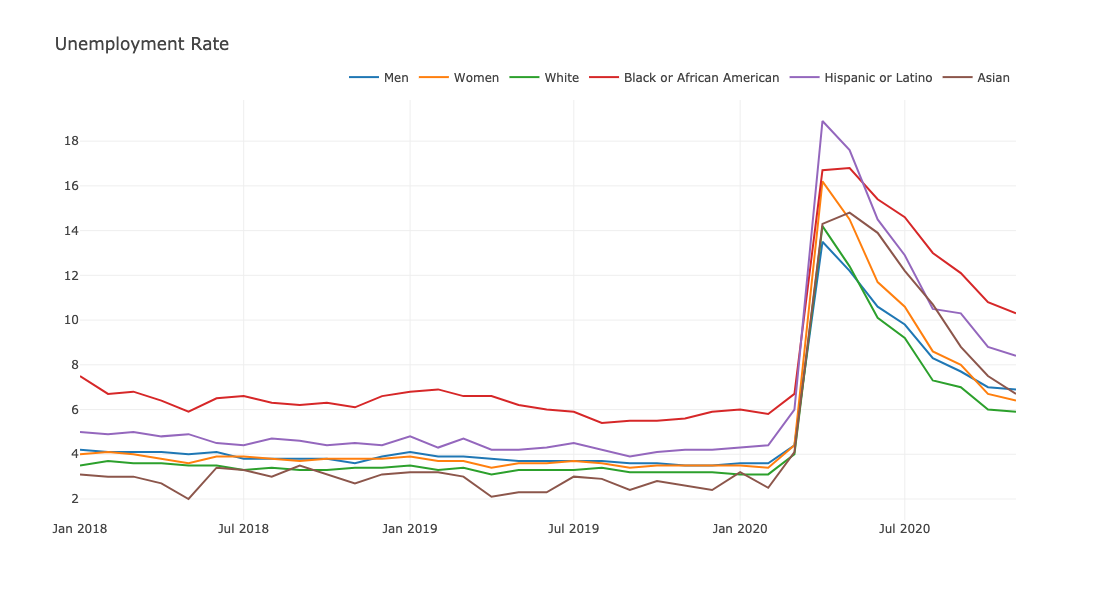

In [20]:
unemployment_rate_ids = ['LNS14000001','LNS14000002','LNS14000003','LNS14000006','LNS14000009','LNU04032183']
demographics = ['Men','Women','White','Black or African American', 'Hispanic or Latino', 'Asian']

df = pdr.get_data_fred(unemployment_rate_ids, start=dt.datetime(2018,1,1), end=end)

fig5 = go.Figure()

for i,j in list(zip(unemployment_rate_ids, demographics)):
    fig5.add_trace(go.Scatter(x=df.index, y=df[i], name=j))


fig5.update_layout(template='none', 
                   title='Unemployment Rate', 
                   title_x=0.05, 
                   height=600, 
                   autosize=True,
                   legend=dict(
                       orientation="h",
                       yanchor="bottom",
                       y=1.02,
                       xanchor="right",
                       x=1))

fig5.show()

Unemployment does hit everyone evenly. Black or African American workers have been hit the hardest and have the highest unemployment rate.

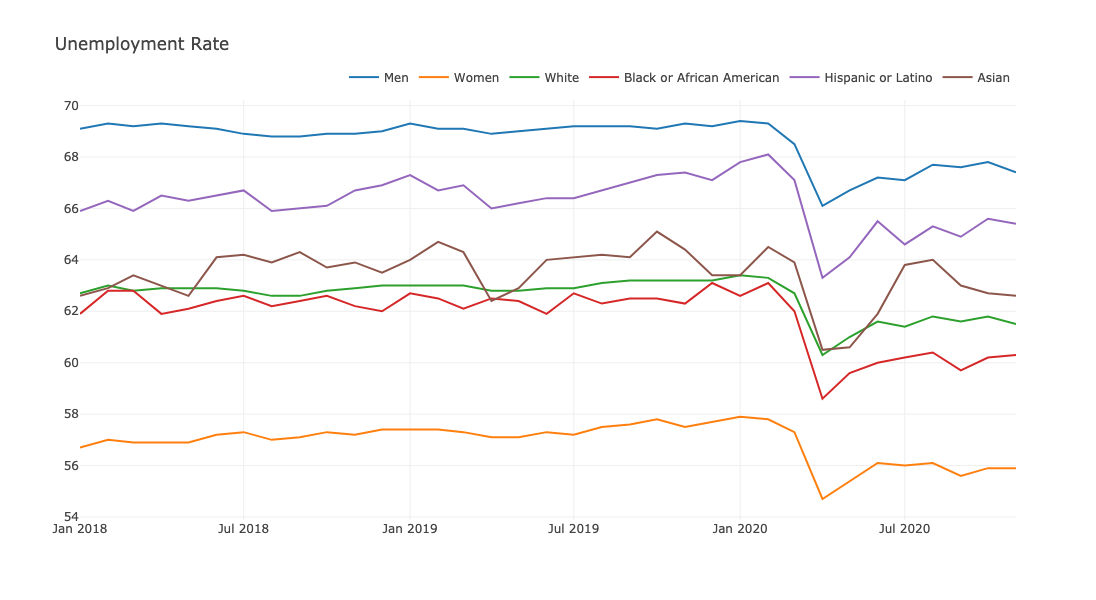

In [21]:
participation_rate_ids = ['LNS11300001','LNS11300002','LNS11300003','LNS11300006','LNS11300009', 'LNU01332183']
demographics = ['Men','Women','White','Black or African American', 'Hispanic or Latino', 'Asian']

df = pdr.get_data_fred(participation_rate_ids, start=dt.datetime(2018,1,1), end=end)

fig6 = go.Figure()

for i,j in list(zip(participation_rate_ids, demographics)):
    fig6.add_trace(go.Scatter(x=df.index, y=df[i], name=j))


fig6.update_layout(template='none', 
                   title='Unemployment Rate', 
                   title_x=0.05, 
                   height=600, 
                   autosize=True,
                   legend=dict(
                       orientation="h",
                       yanchor="bottom",
                       y=1.02,
                       xanchor="right",
                       x=1))

fig6.show()

#fig4.update_yaxes(title_text="Thousands of People",tickformat=",")

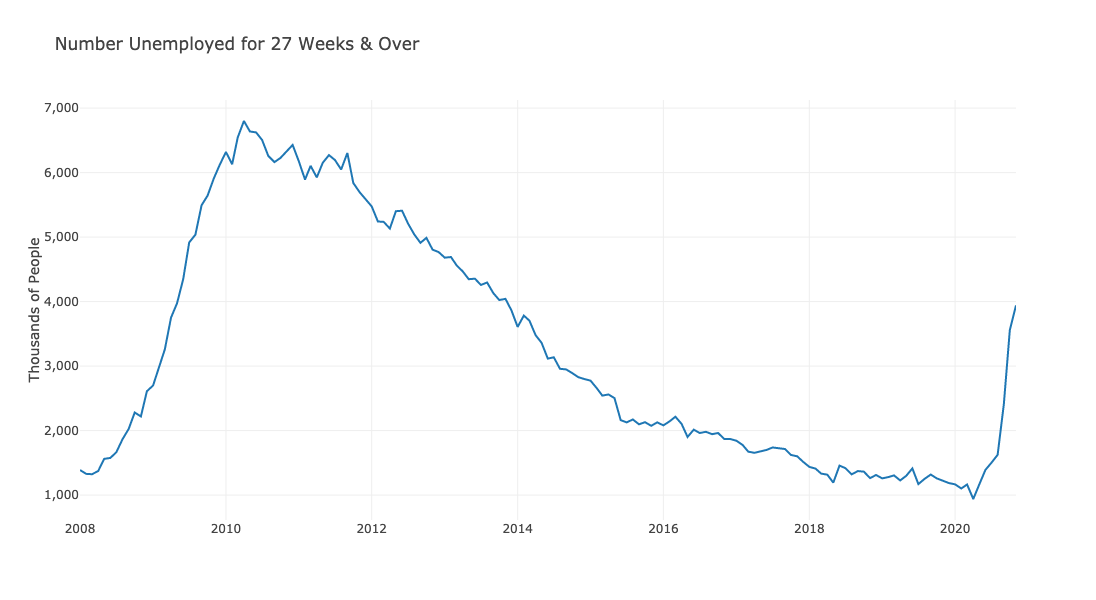

In [124]:
df = pdr.get_data_fred(['UEMP27OV'], start=dt.datetime(2008,1,1), end=end)

fig6 = go.Figure()

fig6.add_trace(go.Scatter(x=df.index, y=df['UEMP27OV'], name='Long Term Unemployed'))

fig6.update_layout(template='none', 
                   title='Number Unemployed for 27 Weeks & Over', 
                   title_x=0.05, 
                   height=600, 
                   autosize=True,
                   legend=dict(
                       orientation="h",
                       yanchor="bottom",
                       y=1.02,
                       xanchor="right",
                       x=1))

fig6.update_yaxes(title_text="Thousands of People",tickformat=",")

This indicator is a measure of how many people have been out of work for at least six months. This is important because the longer someone is not working, the harder it will be for them to join back into the labor force.